In [5]:
import pandas as pd
import numpy as np

file_path = "../Team/US-Covid.csv"
df = pd.read_csv(file_path)
df = df[df['State'] == 'NJ']

df  

,countyFIPS,County Name,State,StateFIPS,population,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,...,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths
1774,34001,Atlantic County,NJ,34,263670,2222,2251,2284,2286,2309,...,355,357,360,359,364,366,368,370,372,372
1775,34003,Bergen County,NJ,34,932202,18302,18333,18376,18408,18463,...,2276,2277,2280,2282,2300,2312,2318,2330,2333,2335
1776,34005,Burlington County,NJ,34,445349,4657,4680,4700,4725,4746,...,606,606,606,606,610,620,624,627,629,630
1777,34007,Camden County,NJ,34,506471,6543,6603,6645,6663,6732,...,780,782,782,785,794,812,818,827,830,833
1778,34009,Cape May County,NJ,34,92039,623,628,629,630,637,...,132,132,132,132,133,134,135,137,137,137
1779,34011,Cumberland County,NJ,34,149527,2310,2345,2431,2469,2531,...,212,212,214,216,221,223,225,229,231,231
1780,34013,Essex County,NJ,34,798975,17695,17752,17811,17912,18019,...,2363,2364,2365,2367,2372,2385,2391,2399,2400,2403
1781,34015,Gloucester County,NJ,34,291636,2245,2262,2278,2290,2310,...,359,359,359,360,367,383,386,397,397,398
1782,34017,Hudson County,NJ,34,672391,18428,18455,18460,18465,18518,...,1677,1678,1679,1681,1687,1695,1699,1707,1711,1713
1783,34019,Hunterdon County,NJ,34,124371,996,999,1006,1009,1015,...,136,136,136,136,137,139,139,139,139,139


In [6]:
columns_case = [col for col in df.columns if '_cases' in col]

county_cases = df[['County Name']].copy()
county_cases['Total Cases'] = df[columns_case].sum(axis=1)

top_counties = county_cases.sort_values(by='Total Cases', ascending=False).head(5)

top_counties

,County Name,Total Cases
1775,Bergen County,5579823
1780,Essex County,5454643
1782,Hudson County,5211610
1785,Middlesex County,4924266
1789,Passaic County,4771133


In [7]:
counties = ['Bergen County', 'Essex County', 'Hudson County', 'Middlesex County', 'Passaic County']

df['County Name'] = df['County Name'].str.strip()  
df_filtered = df[df['County Name'].isin(counties)]

df_filtered

,countyFIPS,County Name,State,StateFIPS,population,2020-06-01_cases,2020-06-02_cases,2020-06-03_cases,2020-06-04_cases,2020-06-05_cases,...,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths,2021-01-01_deaths,2021-01-02_deaths,2021-01-03_deaths
1775,34003,Bergen County,NJ,34,932202,18302,18333,18376,18408,18463,...,2276,2277,2280,2282,2300,2312,2318,2330,2333,2335
1780,34013,Essex County,NJ,34,798975,17695,17752,17811,17912,18019,...,2363,2364,2365,2367,2372,2385,2391,2399,2400,2403
1782,34017,Hudson County,NJ,34,672391,18428,18455,18460,18465,18518,...,1677,1678,1679,1681,1687,1695,1699,1707,1711,1713
1785,34023,Middlesex County,NJ,34,825062,15977,16021,16066,16072,16137,...,1628,1630,1632,1632,1650,1663,1677,1683,1685,1688
1789,34031,Passaic County,NJ,34,501826,16200,16234,16277,16311,16387,...,1426,1426,1426,1427,1435,1451,1458,1460,1462,1462


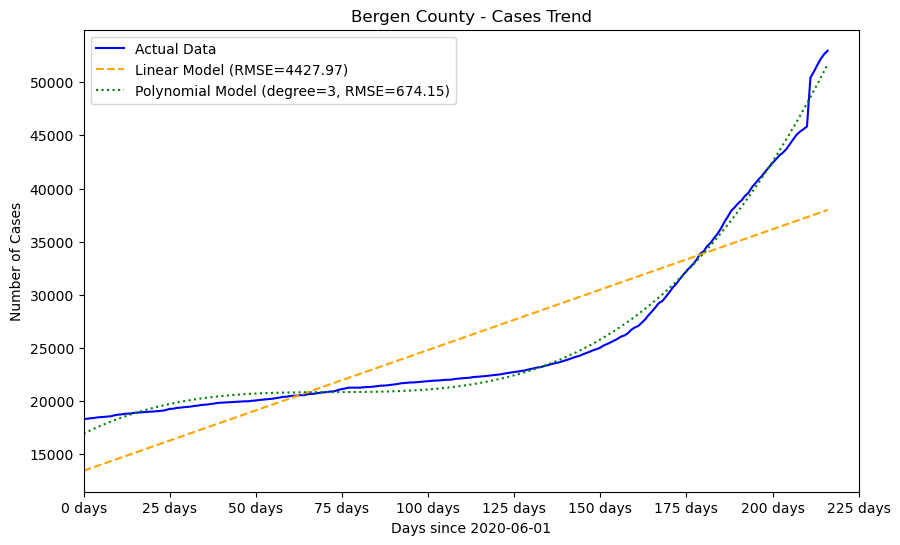

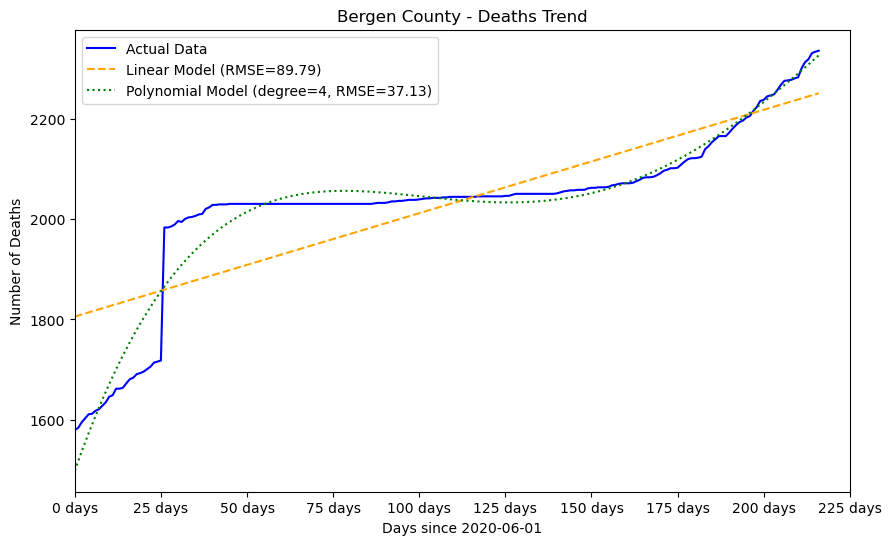

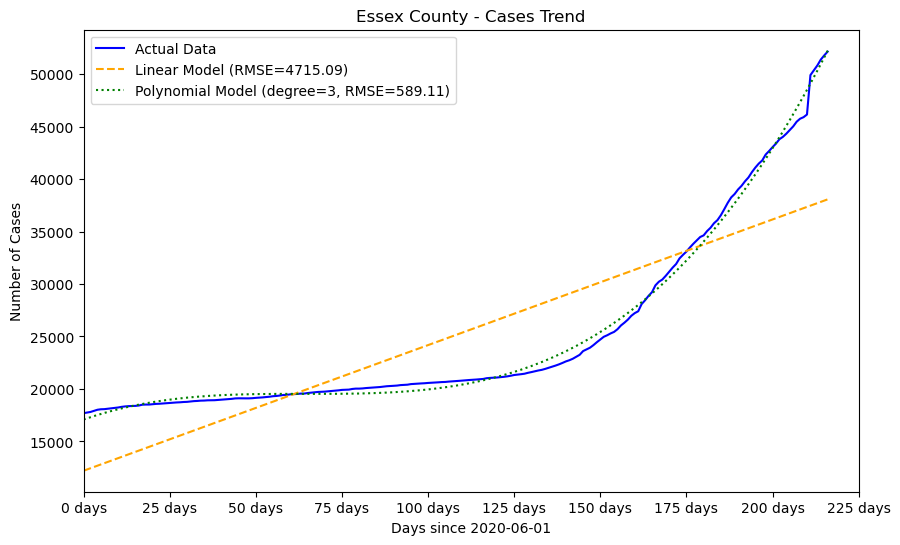

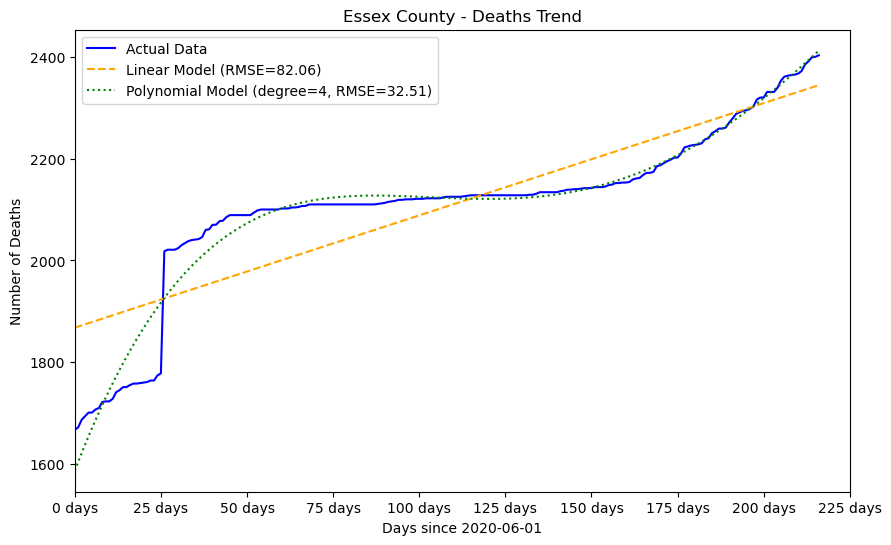

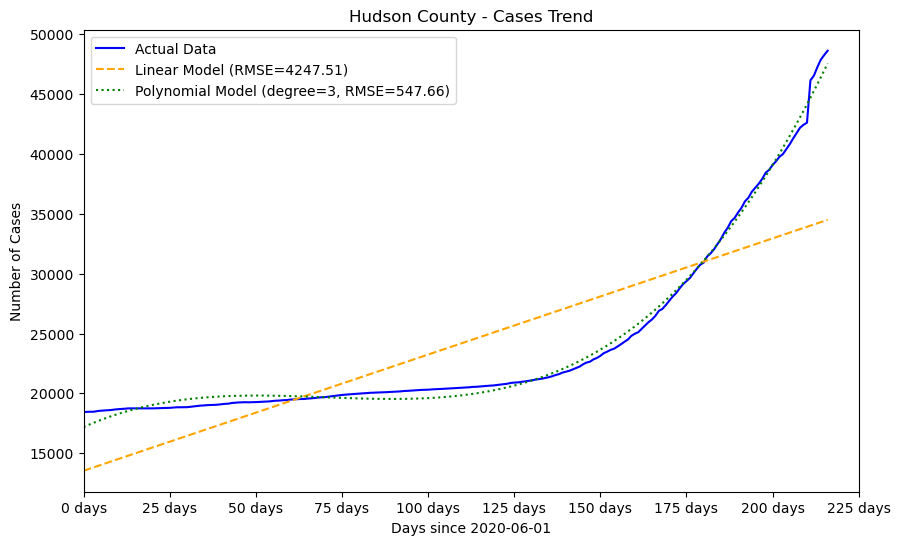

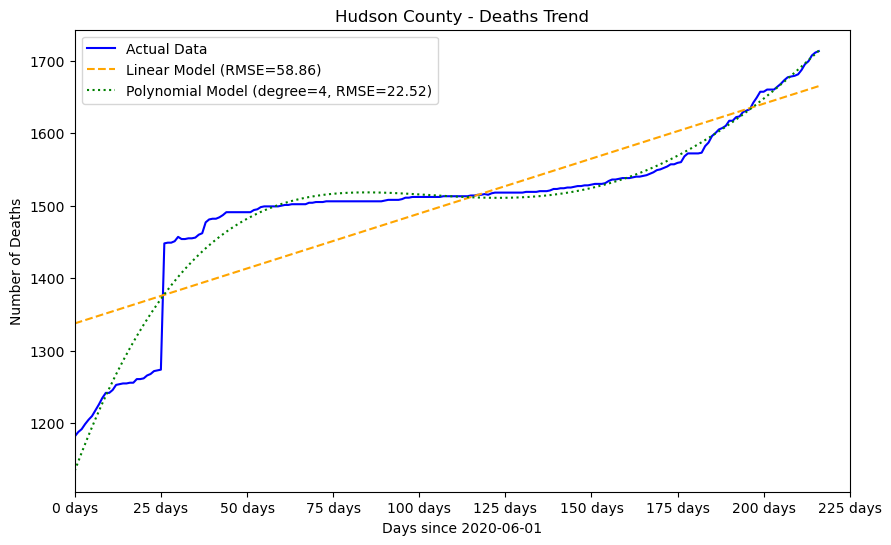

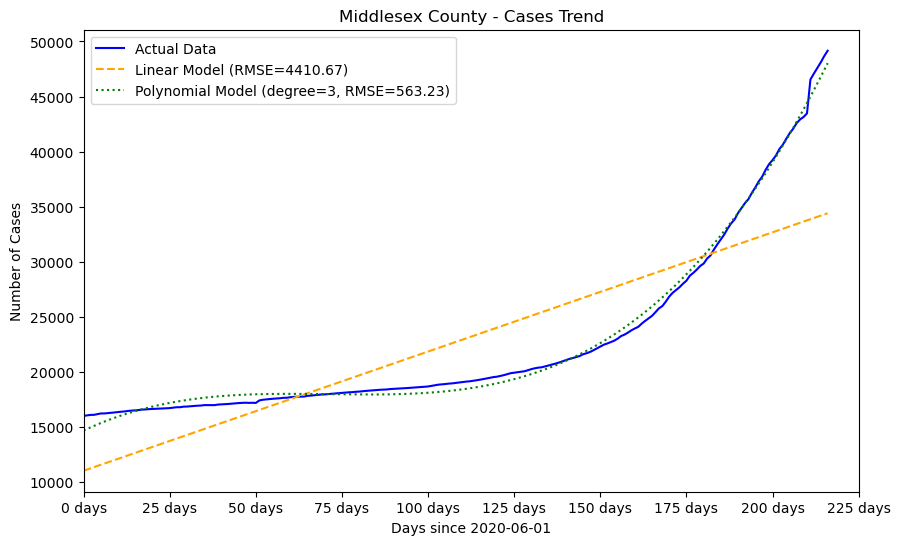

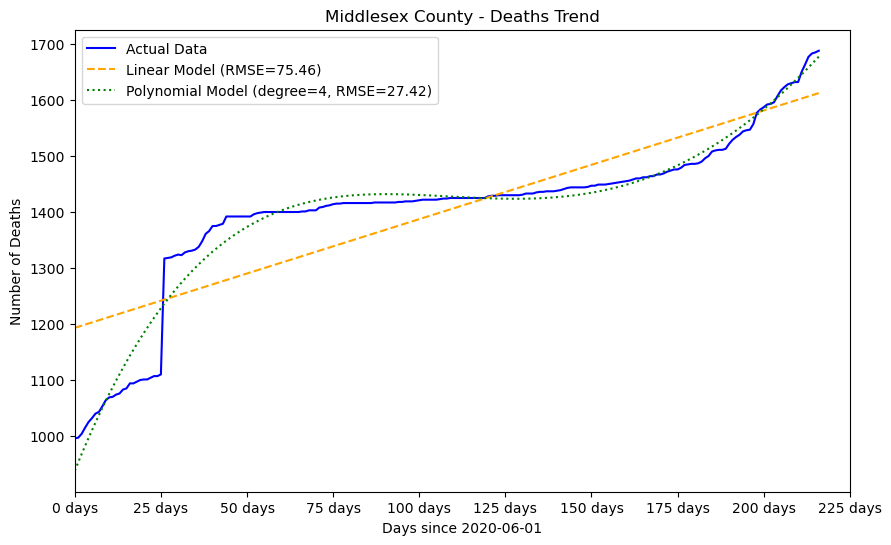

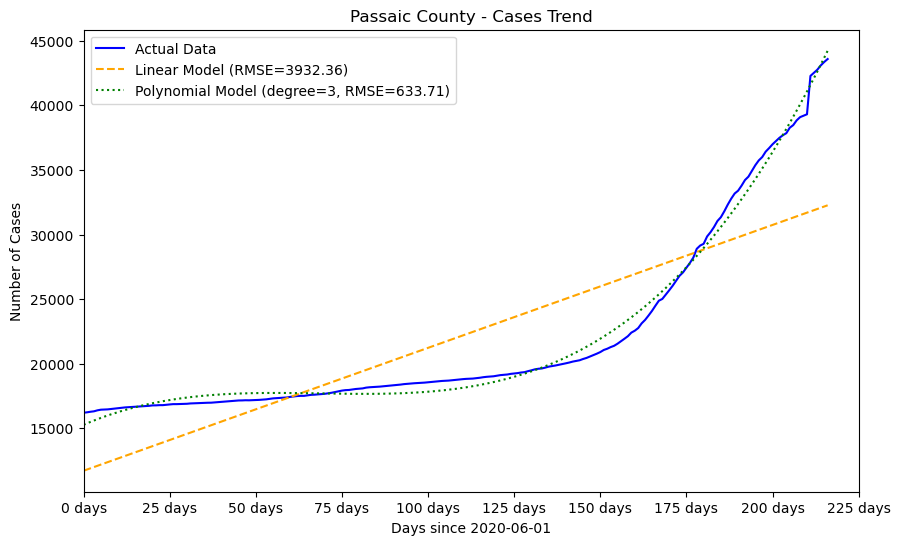

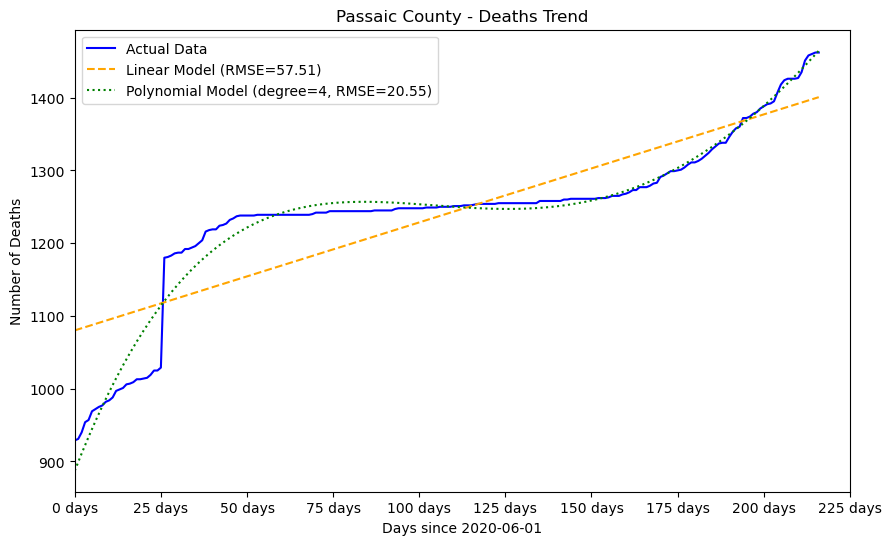

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

start_date = '2020-06-01'
end_date = '2021-01-03'

columns_case = [col for col in df_filtered.columns if '_cases' in col]
columns_deaths = [col for col in df_filtered.columns if '_deaths' in col]

dates = pd.to_datetime([col.split('_')[0] for col in columns_case])
days = (dates - dates.min()).days.values.reshape(-1,1)


def train_and_evaluate(county_data, county_name, feature_columns, degree):
    y_cases = county_data[feature_columns].values.flatten()
    
    linear_model = LinearRegression()
    linear_model.fit(days, y_cases)
    y_pred_linear = linear_model.predict(days)
    rmse_linear = np.sqrt(mean_squared_error(y_cases, y_pred_linear))
    
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_model.fit(days, y_cases)
    y_pred_poly = poly_model.predict(days)
    rmse_poly = np.sqrt(mean_squared_error(y_cases, y_pred_poly))
    
    plt.figure(figsize=(10, 6))
    plt.plot(days, y_cases, label="Actual Data", color='blue')
    plt.plot(days, y_pred_linear, label=f"Linear Model (RMSE={rmse_linear:.2f})", linestyle='--', color='orange')
    plt.plot(days, y_pred_poly, label=f"Polynomial Model (degree={degree}, RMSE={rmse_poly:.2f})", linestyle=':', color='green')
    plt.xlabel("Days since " + start_date)
    plt.ylabel("Number of Cases" if 'cases' in feature_columns[0] else "Number of Deaths")
    plt.title(f"{county_name} - {'Cases' if 'cases' in feature_columns[0] else 'Deaths'} Trend")
    
    plt.xlim(0, days.max())
    tick_values = plt.xticks()[0]
    tick_labels = [f"{int(tick)} days" for tick in tick_values]
    plt.xticks(tick_values, tick_labels)
    plt.legend()
    plt.show()
    
for county in counties:
    county_data = df_filtered[df_filtered['County Name'] == county]
    
    train_and_evaluate(county_data, county, columns_case, degree=3)
    
    # fix the deaths
    train_and_evaluate(county_data, county, columns_deaths, degree=3)